# Python Environment Overview

This Python environment includes a suite of analytics libraries, provided through the Kaggle Python Docker image.

## Installed Libraries

- **NumPy**: For numerical operations and linear algebra.
- **Pandas**: For handling data and performing operations with CSV files.

## Data File Locations

The following datasets are available in this environment:

- **Vehicle Dataset Files**
  - **File**: `car data.csv`
    - **Path**: `/kaggle/input/vehicle-dataset-from-cardekho/car data.csv`
    - **Description**: Contains various features related to vehicles.

  - **File**: `car details v4.csv`
    - **Path**: `/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv`
    - **Description**: Detailed vehicle information, version 4.

  - **File**: `CAR DETAILS FROM CAR DEKHO.csv`
    - **Path**: `/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv`
    - **Description**: Vehicle details sourced from CarDekho.

  - **File**: `Car details v3.csv`
    - **Path**: `/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv`
    - **Description**: Detailed vehicle information, version 3.

## File Management

- **Persistent Storage**: Save up to 20GB of files to the `/kaggle/working/` directory. Files here are retained across notebook versions.
- **Temporary Storage**: Files in `/kaggle/temp/` are temporary and will be removed after the session ends.

## Dataset in Use

For this analysis, we are using only the following dataset:

- **File**: `car data.csv`
  - **Path**: `/kaggle/input/vehicle-dataset-from-cardekho/car data.csv`
  - **Description**: The primary dataset utilized for our current analysis.

This dataset contains essential features related to vehicles, which will be the focus of our study.


## About This Dataset

### Used Car Dataset

This dataset provides details about used cars listed on [www.cardekho.com](http://www.cardekho.com). It is used for tasks such as predicting car prices using machine learning techniques.

#### Columns Description

| **Column**       | **Description**                                                      |
|------------------|----------------------------------------------------------------------|
| `Car_Name`       | The model name of the car.                                           |
| `Year`           | The manufacturing year of the car.                                   |
| `Selling_Price`  | The price at which the car is being sold.                            |
| `Present_Price`  | The current market price of the car.                                 |
| `Kms_Driven`     | The total kilometers driven by the car.                              |
| `Fuel_Type`      | The type of fuel used by the car (e.g., petrol, diesel).              |
| `Seller_Type`    | The type of seller (e.g., individual, dealer).                        |
| `Transmission`   | The transmission type of the car (e.g., manual, automatic).           |
| `Owner`          | The number of previous owners of the car.                             |

   

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns




# Dataset Exploration

## Loading the Dataset

The dataset is loaded using the following code:

```python
# Load the dataset
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')


In [3]:
# Load the dataset
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')

# Display the first few rows and column names
print("First few rows of the dataset:")
print(df.head())
print("\nColumn names:")
print(df.columns)

First few rows of the dataset:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

Column names:
Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


# Data Inspection and Cleaning

## Checking Data Types

We inspect the data types of each column in the dataset to understand the type of data we are working with, such as integers, floats, or strings.

## Handling Missing Values

To ensure the dataset is clean and complete, we remove any rows with missing values. This step is crucial for maintaining the quality and reliability of the data used for analysis.


In [4]:
# Check data types
print("\nData types:")
print(df.dtypes)

# Handle missing values
df = df.dropna()



Data types:
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object


# Data Type Conversion

## Converting 'Kms_Driven' to Numeric

We ensure that the 'Kms_Driven' column is in numeric format for accurate analysis. If the column is of type `object` (which may happen if it's formatted as text), we:

1. **Remove Unnecessary Characters**: Strip out text like " km" and commas.
2. **Convert to Float**: Convert the cleaned values to numeric format.

If 'Kms_Driven' is already numeric, we directly convert it to ensure consistency. This step prepares the data for further analysis and modeling.


In [5]:
# Convert 'Kms_Driven' to numeric if it is of object type
if df['Kms_Driven'].dtype == 'object':
    df['Kms_Driven'] = df['Kms_Driven'].str.replace(' km', '').str.replace(',', '').astype(float)
else:
    df['Kms_Driven'] = pd.to_numeric(df['Kms_Driven'], errors='coerce')


# Data Preparation

## Column Removal

The 'Car_Name' column is dropped as it is not needed for prediction.

## Categorical Encoding

Categorical variables are converted to numerical format using one-hot encoding.

## Verification

The DataFrame is displayed to confirm the changes.


In [6]:
# Drop 'Car_Name' as it's not used for prediction
df = df.drop('Car_Name', axis=1, errors='ignore')

# Encode categorical variables
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

# Display the DataFrame after encoding
print("\nDataFrame after encoding categorical variables:")
print(df.head())



DataFrame after encoding categorical variables:
   Year  Selling_Price  Present_Price  Kms_Driven  Owner  Fuel_Type_Diesel  \
0  2014           3.35           5.59       27000      0             False   
1  2013           4.75           9.54       43000      0              True   
2  2017           7.25           9.85        6900      0             False   
3  2011           2.85           4.15        5200      0             False   
4  2014           4.60           6.87       42450      0              True   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0              True                   False                 True  
1             False                   False                 True  
2              True                   False                 True  
3              True                   False                 True  
4             False                   False                 True  


# Feature and Target Variable Separation

## Splitting Data

- **Features (X)**: All columns except 'Selling_Price' are selected as features.
- **Target Variable (y)**: The 'Selling_Price' column is designated as the target variable.

This separation prepares the dataset for training and testing machine learning models.


In [7]:
# Separate features and target variable
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Standardization

## Scaling

- **StandardScaler**: Standardizes features by removing the mean and scaling to unit variance.
- **Training Data**: Scaled using `fit_transform`.
- **Testing Data**: Scaled using `transform` to ensure consistency.

This step ensures that all features contribute equally to the model's performance.


In [9]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Training and Evaluation

- **Models**: Linear Regression and Lasso Regression.
- **Training**: Both models are trained on scaled data.
- **Evaluation**: Predictions are made on test data, and performance is measured using Mean Squared Error (MSE) and R^2 Score.


In [10]:
# Initialize and train models
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate model performance
print("\nLinear Regression Model:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_linear)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_linear)}")

print("\nLasso Regression Model:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_lasso)}")



Linear Regression Model:
Mean Squared Error: 3.4788039706379044
R^2 Score: 0.8489813024899066

Lasso Regression Model:
Mean Squared Error: 3.580585463389705
R^2 Score: 0.8445628562090166


# Feature Importance Visualization

- **Objective**: Visualize the importance of features in the Lasso Regression model.
- **Approach**:
  - Extract coefficients from the Lasso model.
  - Create a DataFrame to organize and sort feature coefficients.
  - Plot a horizontal bar chart to display feature importance.
- **Plot**: Shows features on the y-axis and their corresponding coefficients on the x-axis, indicating the impact of each feature on the model.


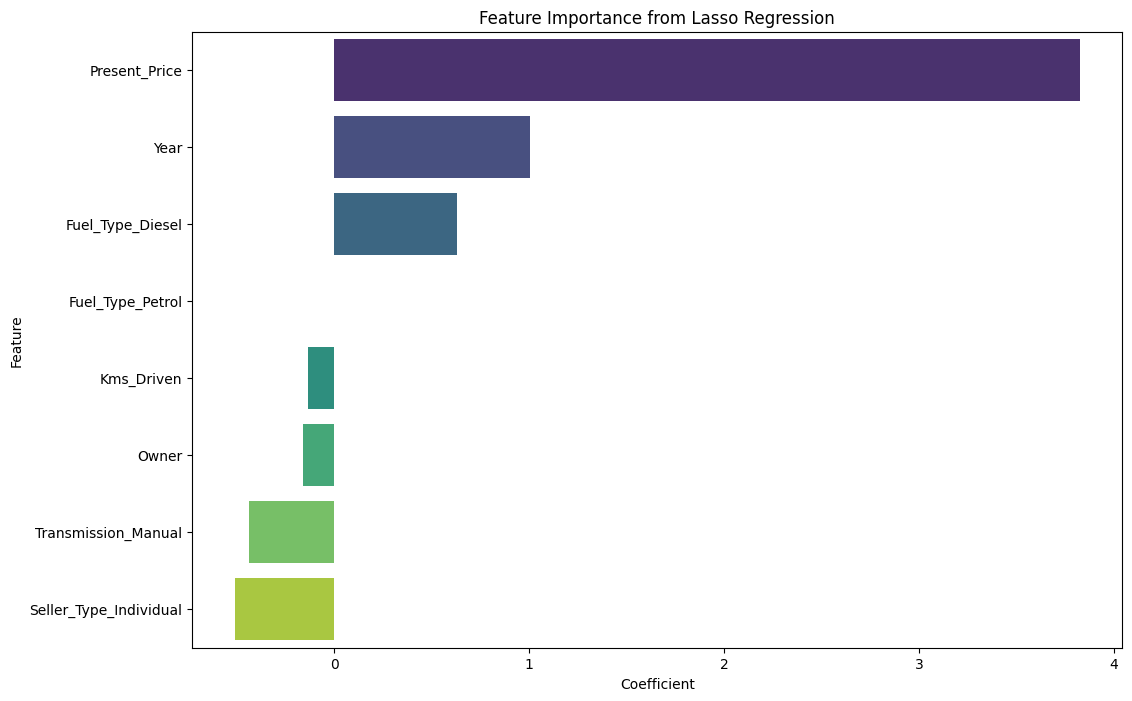

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names
feature_names = X.columns

# Get coefficients from the Lasso model
coefficients = lasso_model.coef_

# Create a DataFrame for visualization
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Feature Importance from Lasso Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


# Visualization of Model Predictions

- **Purpose**: Compare predictions from Linear and Lasso Regression models.
- **Approach**: 
  - Plot actual vs. predicted values for each model.
  - **Linear Regression**: Blue scatter plot with a reference line.
  - **Lasso Regression**: Green scatter plot with a reference line.


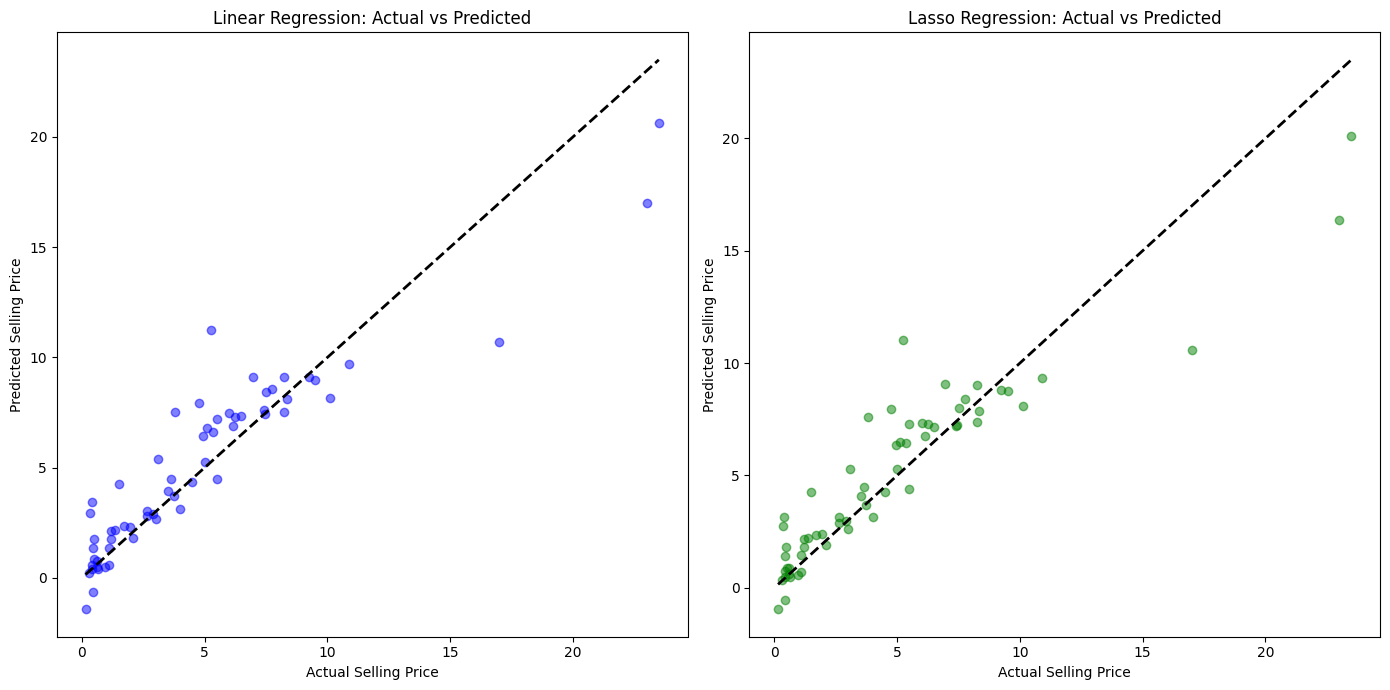

In [12]:
# Create a DataFrame for actual vs. predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Linear_Prediction': y_pred_linear,
    'Lasso_Prediction': y_pred_lasso
})

# Plot predictions vs. actual values
plt.figure(figsize=(14, 7))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(results_df['Actual'], results_df['Linear_Prediction'], alpha=0.5, color='blue')
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], 
         [results_df['Actual'].min(), results_df['Actual'].max()], 'k--', lw=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')

# Lasso Regression
plt.subplot(1, 2, 2)
plt.scatter(results_df['Actual'], results_df['Lasso_Prediction'], alpha=0.5, color='green')
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], 
         [results_df['Actual'].min(), results_df['Actual'].max()], 'k--', lw=2)
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')

plt.tight_layout()
plt.show()


# Predictions vs. Actual Values

- **Objective**: Compare model predictions with actual selling prices.
- **Visuals**:
  - **Linear Regression**: 
    - **Plot**: Scatter plot (blue) of actual vs. predicted values.
    - **Reference Line**: Black dashed line where actual equals predicted.
  - **Lasso Regression**: 
    - **Plot**: Scatter plot (green) of actual vs. predicted values.
    - **Reference Line**: Black dashed line where actual equals predicted.


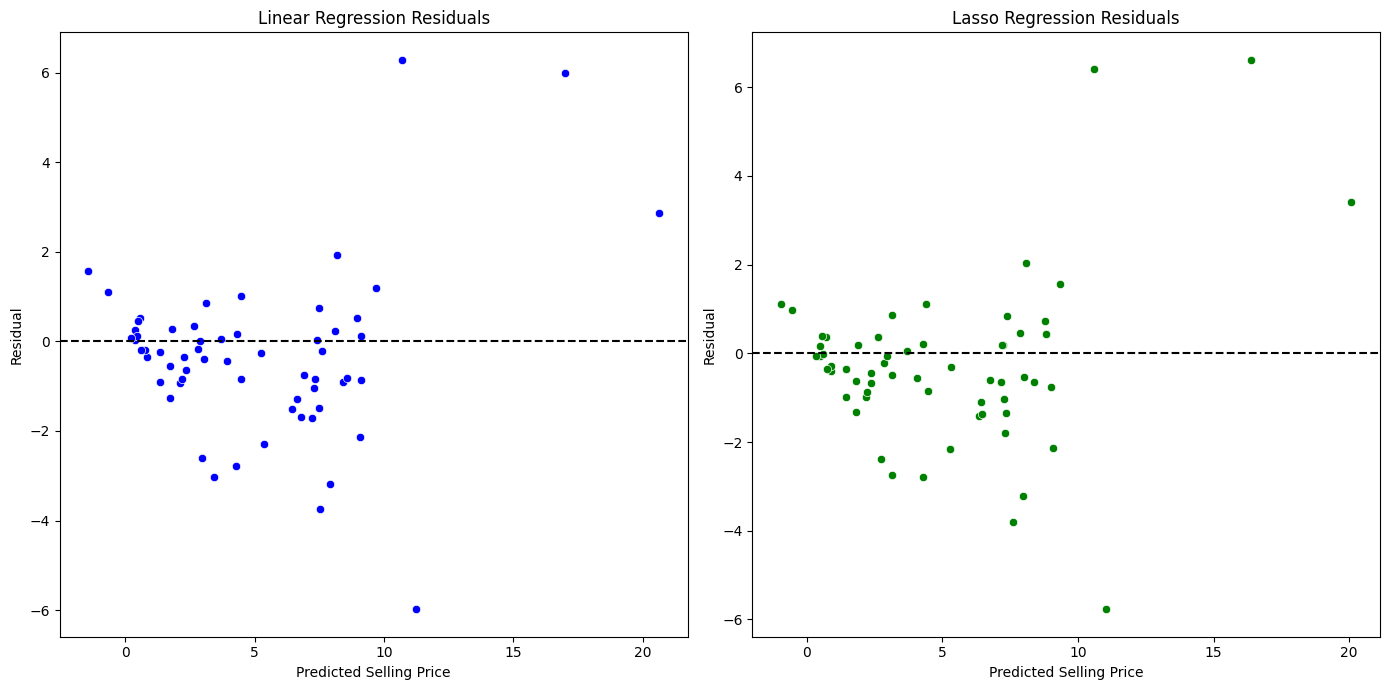

In [13]:
# Calculate residuals
results_df['Residual_Linear'] = results_df['Actual'] - results_df['Linear_Prediction']
results_df['Residual_Lasso'] = results_df['Actual'] - results_df['Lasso_Prediction']

plt.figure(figsize=(14, 7))

# Residuals for Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=results_df['Linear_Prediction'], y=results_df['Residual_Linear'], color='blue')
plt.axhline(y=0, color='k', linestyle='--')
plt.title('Linear Regression Residuals')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residual')

# Residuals for Lasso Regression
plt.subplot(1, 2, 2)
sns.scatterplot(x=results_df['Lasso_Prediction'], y=results_df['Residual_Lasso'], color='green')
plt.axhline(y=0, color='k', linestyle='--')
plt.title('Lasso Regression Residuals')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residual')

plt.tight_layout()
plt.show()


# Model Performance Comparison

**Objective**: To compare the performance of Linear Regression and Lasso Regression models.

## Metrics Compared:
- **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
- **R^2 Score**: Indicates the proportion of variance in the dependent variable that is predictable from the independent variables.

## Models:
- **Linear Regression**
- **Lasso Regression**

## Visualization:
- **Bar Chart**: Displays the Mean Squared Error and R^2 Score for each model, facilitating a clear comparison of their performance.

This chart provides a straightforward way to evaluate which model performs better in terms of prediction accuracy and variance explanation.


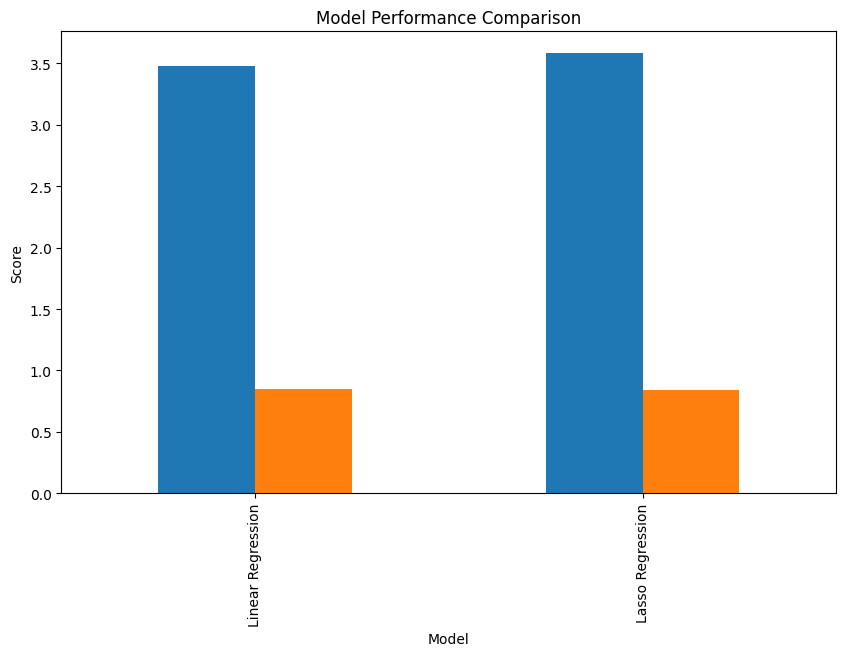

In [14]:
import pandas as pd

# Create a DataFrame for performance metrics
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression'],
    'Mean Squared Error': [mean_squared_error(y_test, y_pred_linear), mean_squared_error(y_test, y_pred_lasso)],
    'R^2 Score': [r2_score(y_test, y_pred_linear), r2_score(y_test, y_pred_lasso)]
})

# Plot performance metrics
metrics_df.plot(x='Model', kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'], legend=False)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()


### Predictions vs. Actual Values

This visualization compares the predicted values against the actual values for both Linear and Lasso Regression models.

- **Linear Regression**:
  - Scatter plot showing actual vs. predicted values.
  - **X-axis**: Actual values
  - **Y-axis**: Predicted values

- **Lasso Regression**:
  - Scatter plot showing actual vs. predicted values.
  - **X-axis**: Actual values
  - **Y-axis**: Predicted values

The layout is adjusted for clarity, with both plots side by side for easy comparison.


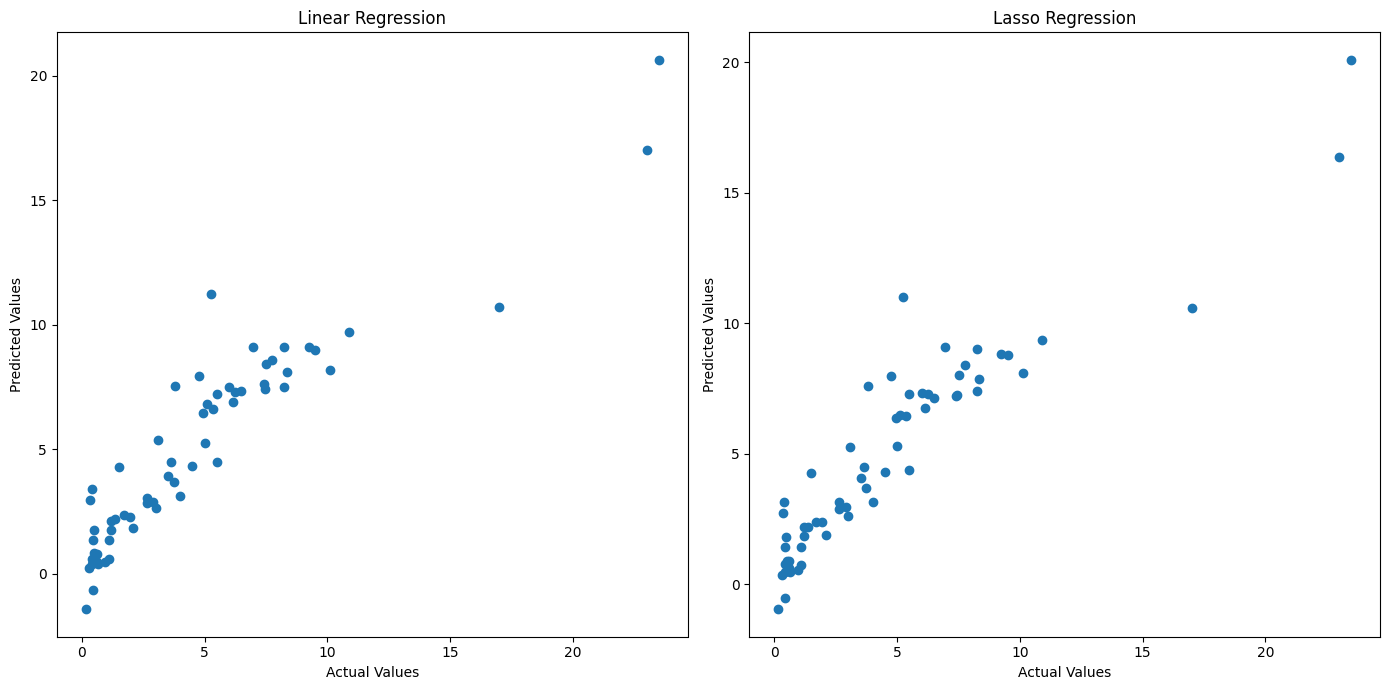

In [15]:
# Visualize predictions vs. actual values
plt.figure(figsize=(14, 7))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')

# Lasso Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression')

plt.tight_layout()
plt.show()


### Distribution of Selling Prices

This Plotly visualization provides insights into the distribution of car selling prices through both a histogram and a Kernel Density Estimate (KDE) line:

- **Histogram**:
  - **X-axis**: Selling Price
  - **Y-axis**: Density
  - **Color**: Blue
  - **Opacity**: 0.7
  - **Normalization**: Density

- **KDE Line**:
  - **Color**: Red
  - Represents the smoothed distribution of selling prices.

The histogram is normalized to show density, with KDE overlaid to illustrate the distribution more clearly. The layout includes titles and axis labels for better readability.


In [16]:
import plotly.graph_objects as go

# Create a histogram with a KDE line using Plotly
fig = go.Figure()

# Add histogram trace
fig.add_trace(go.Histogram(
    x=df['Selling_Price'],
    name='Selling Price',
    marker_color='blue',
    opacity=0.7,
    histnorm='density',  # Normalize to show density
    nbinsx=30  # Number of bins
))

# Add KDE trace
fig.add_trace(go.Scatter(
    x=df['Selling_Price'].sort_values(),
    y=df['Selling_Price'].sort_values().pipe(lambda x: x.value_counts(normalize=True).sort_index()),
    mode='lines',
    name='KDE',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Distribution of Selling Prices',
    xaxis_title='Selling Price',
    yaxis_title='Density',
    bargap=0.1,
    template='plotly_white'
)

# Show figure
fig.show()


### Pairplot of Features

This Plotly visualization shows a pairplot of selected features in the dataset. The grid of subplots includes:

- **Features Plotted**: 'Selling_Price', 'Present_Price', 'Kms_Driven', and 'Owner'.

#### Plot Details:

- **Diagonal**: Displays Kernel Density Estimates (KDE) for each feature. This gives a smooth estimate of the feature distribution.
- **Off-Diagonal**: Shows scatter plots for pairs of features to visualize their relationships.

#### Layout:

- **Title**: "Pairplot of Features"
- **Size**: 1000x1000 pixels
- **Color Scheme**: Blue markers for scatter plots and blue lines for KDE
- **Axis Titles**: Displayed on the diagonal for each feature

The layout is designed to be clean with minimal axis ticks for clarity, and the Plotly white template is used for a clean background.


In [17]:
import plotly.graph_objects as go
import plotly.subplots as sp
import numpy as np

# Define the features to plot
features = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

# Create a subplot grid for the pairplot
fig = sp.make_subplots(rows=len(features), cols=len(features), shared_xaxes='all', shared_yaxes='all', 
                        subplot_titles=[f'{x} vs {y}' for x in features for y in features])

# Add scatter plots to the subplot grid
for i, feature_x in enumerate(features):
    for j, feature_y in enumerate(features):
        if i == j:
            # Add diagonal KDE plots
            data = df[feature_x].dropna()
            hist_data = np.histogram(data, bins=30, density=True)
            x = hist_data[1][:-1]
            y = hist_data[0]
            fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=feature_x, line=dict(color='blue')), 
                          row=i + 1, col=j + 1)
        else:
            # Add scatter plots
            fig.add_trace(go.Scatter(x=df[feature_x], y=df[feature_y], mode='markers', marker=dict(size=5, color='blue')),
                          row=i + 1, col=j + 1)

# Update layout
fig.update_layout(
    title='Pairplot of Features',
    height=1000, width=1000,
    showlegend=False,
    xaxis_title='',
    yaxis_title='',
    xaxis=dict(tickvals=[], ticktext=[]),
    yaxis=dict(tickvals=[], ticktext=[]),
    template='plotly_white'
)

# Update axis titles for diagonal
for i, feature in enumerate(features):
    fig.update_xaxes(title_text=feature, row=len(features), col=i + 1)
    fig.update_yaxes(title_text=feature, col=i + 1, row=1)

# Show figure
fig.show()

### Correlation Heatmap

This visualization displays a heatmap of the correlation matrix for selected features in the dataset. It helps to understand the linear relationships between features.

#### Features Included:

- **Numerical Features**: 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'
- **Encoded Categorical Features**: Includes features related to 'Fuel_Type', 'Seller_Type', and 'Transmission'

#### Heatmap Details:

- **Color Map**: `coolwarm` - A gradient from blue to red indicating negative to positive correlations.
- **Annotations**: Correlation coefficients are displayed for each cell.
- **Title**: "Correlation Heatmap"

This plot provides insight into which features have strong correlations with each other, which can be useful for feature selection and understanding relationships in the dataset.


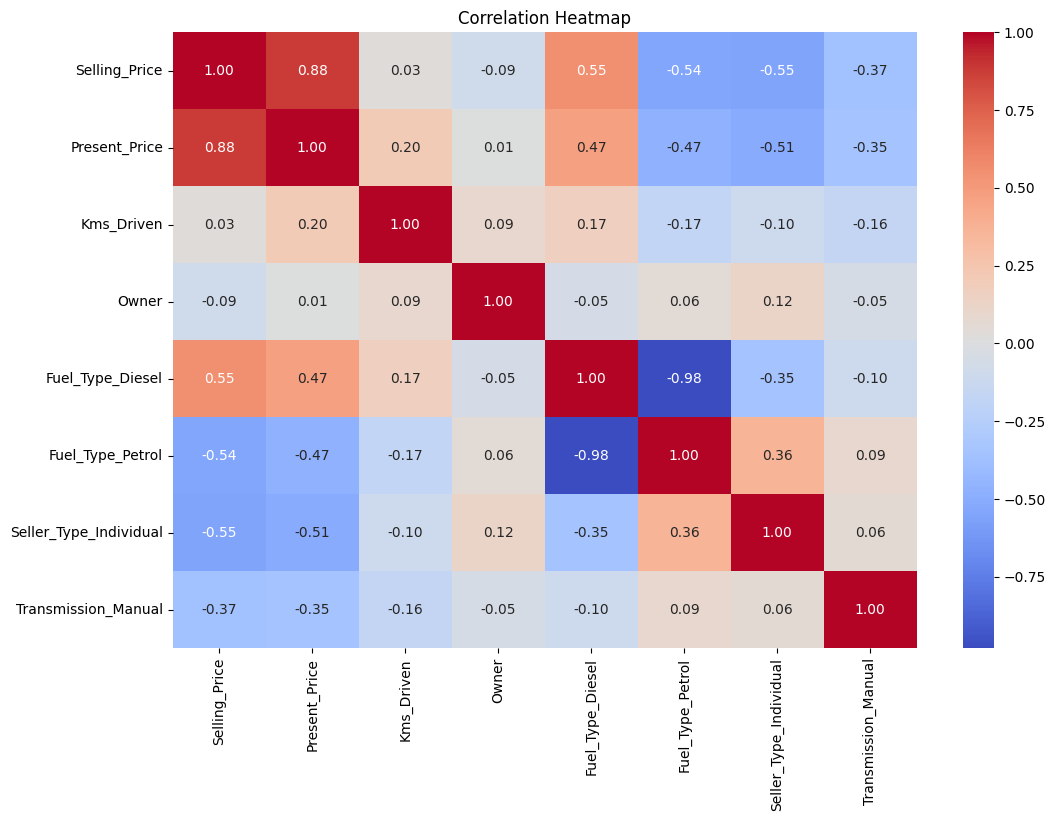

In [18]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'] + 
                  [col for col in df.columns if col.startswith('Fuel_Type') or 
                   col.startswith('Seller_Type') or col.startswith('Transmission')]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### Residuals Distribution

This visualization shows the distribution of residuals for both Linear Regression and Lasso Regression models. Residuals represent the difference between the actual and predicted values.

#### Plot Details:

- **Left Plot**: Distribution of residuals for **Linear Regression**
  - **Color**: Blue
  - **Plot Type**: Histogram with Kernel Density Estimate (KDE)
  - **Title**: "Residuals Distribution: Linear Regression"
  - **X-axis**: Residual values

- **Right Plot**: Distribution of residuals for **Lasso Regression**
  - **Color**: Green
  - **Plot Type**: Histogram with Kernel Density Estimate (KDE)
  - **Title**: "Residuals Distribution: Lasso Regression"
  - **X-axis**: Residual values

These plots help evaluate the performance of the models by illustrating how well the model's predictions match the actual values. Ideally, residuals should be randomly distributed around zero, indicating that the model captures the underlying trend of the data well.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



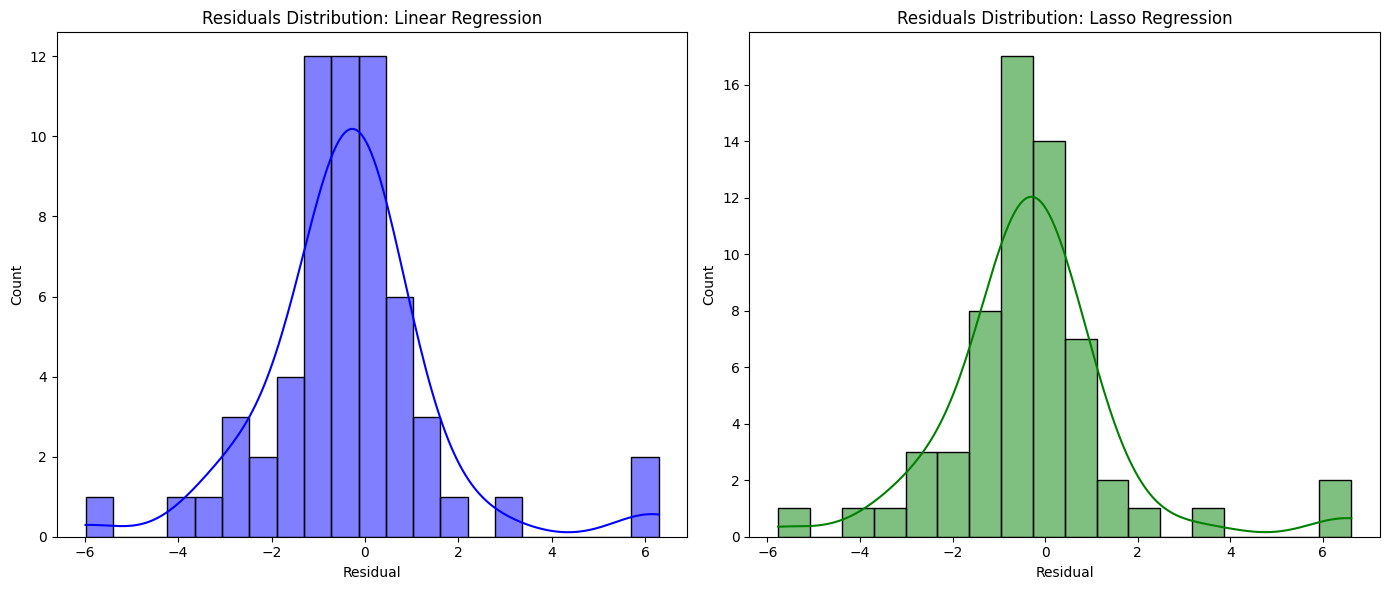

In [19]:
# Calculate residuals for both models
residuals_linear = y_test - y_pred_linear
residuals_lasso = y_test - y_pred_lasso

plt.figure(figsize=(14, 6))

# Residuals distribution for Linear Regression
plt.subplot(1, 2, 1)
sns.histplot(residuals_linear, kde=True, color='blue')
plt.title('Residuals Distribution: Linear Regression')
plt.xlabel('Residual')

# Residuals distribution for Lasso Regression
plt.subplot(1, 2, 2)
sns.histplot(residuals_lasso, kde=True, color='green')
plt.title('Residuals Distribution: Lasso Regression')
plt.xlabel('Residual')

plt.tight_layout()
plt.show()


### Actual vs Predicted Values

This set of plots compares the actual selling prices with the predicted selling prices from both Linear Regression and Lasso Regression models.

#### Plot Details:

- **Left Plot**: **Linear Regression: Actual vs Predicted**
  - **Scatter Plot**: Displays actual vs. predicted values with points colored in blue.
  - **Regression Line**: Overlaid in red to show the fit of the Linear Regression model.
  - **X-axis**: Actual Selling Price
  - **Y-axis**: Predicted Selling Price
  - **Title**: "Linear Regression: Actual vs Predicted"

- **Right Plot**: **Lasso Regression: Actual vs Predicted**
  - **Scatter Plot**: Displays actual vs. predicted values with points colored in green.
  - **Regression Line**: Overlaid in red to show the fit of the Lasso Regression model.
  - **X-axis**: Actual Selling Price
  - **Y-axis**: Predicted Selling Price
  - **Title**: "Lasso Regression: Actual vs Predicted"

These plots help in assessing how well each model performs by illustrating how closely the predicted values match the actual values.


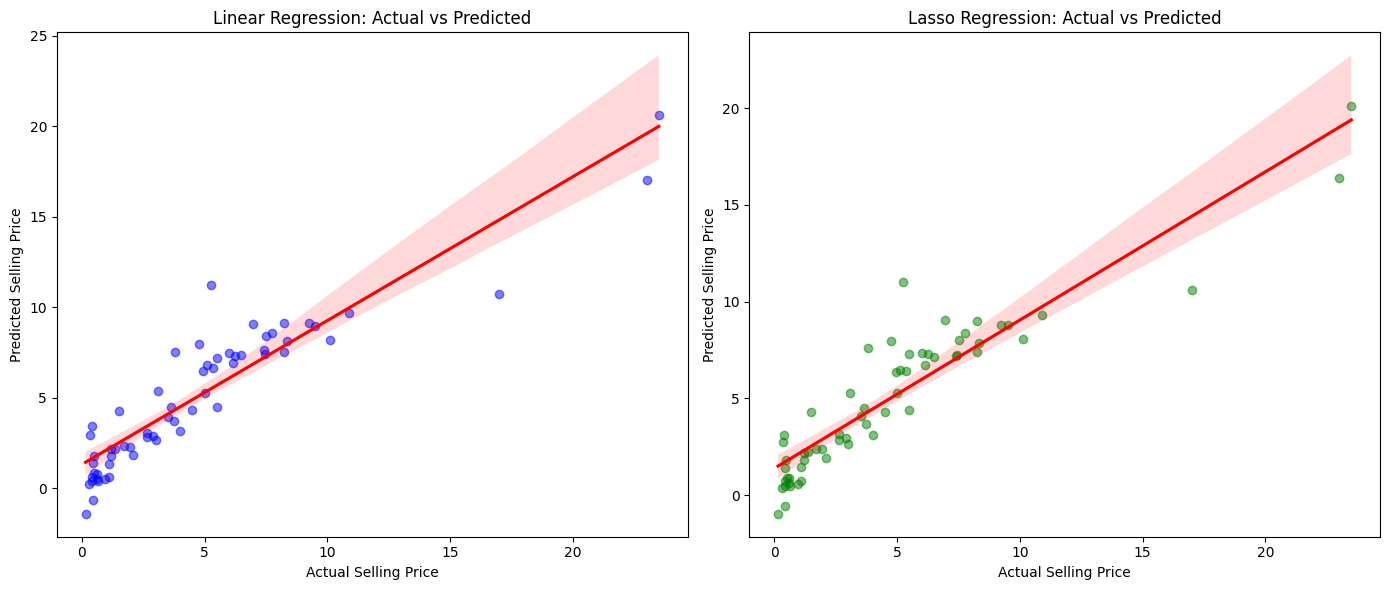

In [20]:
plt.figure(figsize=(14, 6))

# Actual vs Predicted with Linear Regression Line
plt.subplot(1, 2, 1)
sns.regplot(x=y_test, y=y_pred_linear, scatter_kws={'alpha':0.5, 'color':'blue'}, line_kws={'color':'red'})
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')

# Actual vs Predicted with Lasso Regression Line
plt.subplot(1, 2, 2)
sns.regplot(x=y_test, y=y_pred_lasso, scatter_kws={'alpha':0.5, 'color':'green'}, line_kws={'color':'red'})
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')

plt.tight_layout()
plt.show()


### Learning Curves

Learning curves are used to evaluate the performance of a model with respect to varying sizes of training data. They help in understanding how well a model is learning and whether it is underfitting or overfitting.

#### Plots:

1. **Learning Curve: Linear Regression**
   - **Training Score**: Plotted in blue to show the model's performance on the training data as the size of the training set increases.
   - **Cross-validation Score**: Plotted in green to show the model's performance on unseen validation data.
   - **X-axis**: Training Size (percentage of data used for training)
   - **Y-axis**: Score (e.g., accuracy or mean squared error)

2. **Learning Curve: Lasso Regression**
   - **Training Score**: Plotted in blue to show the model's performance on the training data as the size of the training set increases.
   - **Cross-validation Score**: Plotted in green to show the model's performance on unseen validation data.
   - **X-axis**: Training Size (percentage of data used for training)
   - **Y-axis**: Score (e.g., accuracy or mean squared error)

These curves are plotted to assess how each model's performance changes with the amount of training data. They help identify if a model needs more data to improve performance or if it is already performing well with the current data.


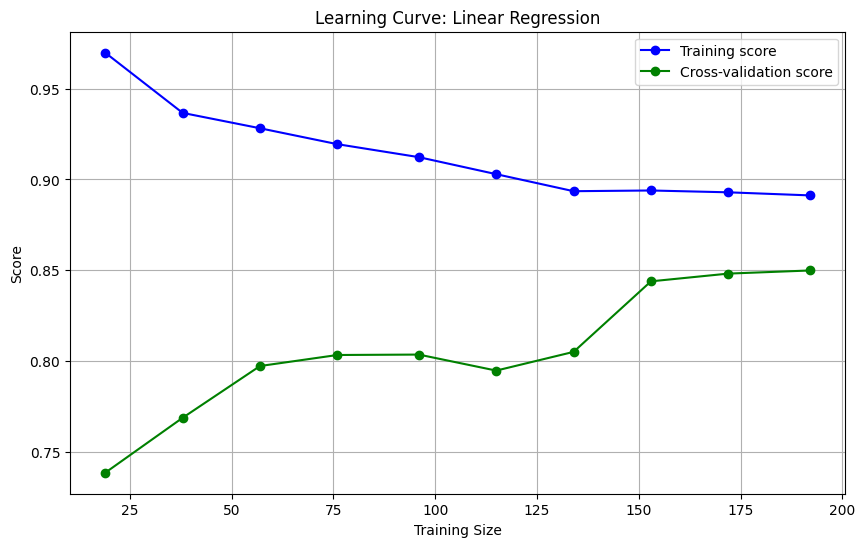

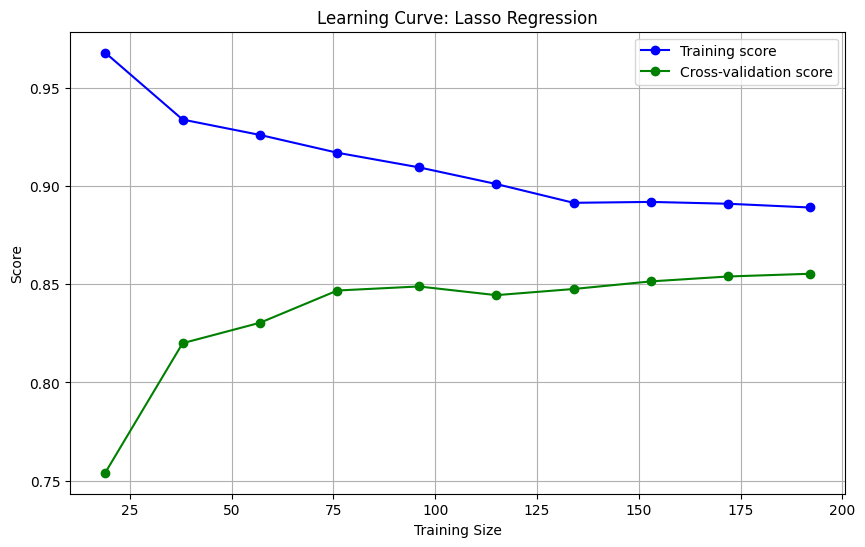

In [21]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-validation score')
    plt.title(title)
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Plot learning curves for Linear Regression and Lasso Regression
plot_learning_curve(LinearRegression(), X_train_scaled, y_train, 'Learning Curve: Linear Regression')
plot_learning_curve(Lasso(alpha=0.1), X_train_scaled, y_train, 'Learning Curve: Lasso Regression')
